In [210]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [211]:
df=pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [212]:
df.shape

(10000, 14)

In [213]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [215]:
df.duplicated().sum()

0

In [216]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [217]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [218]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [219]:
df.drop(columns=['RowNumber','Surname','CustomerId'],inplace=True)

In [220]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [221]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [222]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [223]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [224]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=1)

In [225]:
x_train.shape

(8000, 11)

In [226]:
#Scaling on data
from sklearn.preprocessing import StandardScaler

In [227]:
scaler=StandardScaler()

In [228]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [229]:
 x_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [230]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [231]:
model=Sequential()

In [232]:
#create Layesrs
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [233]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [234]:
#Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [241]:
#fit the model
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8686 - loss: 0.3161 - val_accuracy: 0.8569 - val_loss: 0.3388
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8607 - loss: 0.3198 - val_accuracy: 0.8587 - val_loss: 0.3391
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8697 - loss: 0.3252 - val_accuracy: 0.8531 - val_loss: 0.3424
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8709 - loss: 0.3163 - val_accuracy: 0.8544 - val_loss: 0.3420
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8697 - loss: 0.3203 - val_accuracy: 0.8587 - val_loss: 0.3406
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.3190 - val_accuracy: 0.8581 - val_loss: 0.3397
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.3215 - val_accuracy: 0.8537 - val_loss: 0.3418
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8698 - loss: 0.3207 - val_accu

In [236]:
model.layers[0].get_weights()

[array([[ 3.59173715e-01, -5.01215309e-02,  4.04178444e-03,
         -6.20686561e-02,  5.01328230e-01,  1.41528109e-02,
          1.67683274e-01,  2.01161608e-01, -4.26249236e-01,
         -3.26971889e-01,  2.39210259e-02],
        [ 3.64750654e-01,  5.16549721e-02, -1.93387568e-02,
         -2.32107326e-01,  5.40755272e-01,  3.60490799e-01,
         -7.24862516e-01,  2.09759533e-01, -4.31366056e-01,
          1.14189637e+00, -9.32950750e-02],
        [ 2.15206847e-01,  3.81868303e-01,  1.94580793e-01,
         -5.59502468e-02,  9.28450227e-02,  2.17805132e-01,
          1.00342311e-01,  4.49906766e-01,  3.32654953e-01,
          4.07498479e-01,  4.08094339e-02],
        [-1.99264809e-01,  4.27031279e-01, -6.25918508e-01,
          4.35911238e-01, -5.57865560e-01,  1.04404345e-01,
         -3.52901220e-01, -5.88058472e-01,  3.31744850e-01,
         -3.02710116e-01, -8.36813271e-01],
        [ 8.32751989e-01, -2.92123139e-01, -2.90891975e-01,
          5.26631415e-01, -5.22026181e-01, -

In [237]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [238]:
y_pred=np.where(y_log >0.5,1,0)

In [239]:
from sklearn.metrics import accuracy_score

In [240]:
accuracy_score(y_test,y_pred)

0.867

In [244]:
import matplotlib.pyplot as plt

In [245]:
history.history

{'accuracy': [0.8693749904632568,
  0.8670312762260437,
  0.8695312738418579,
  0.8695312738418579,
  0.8682812452316284,
  0.8690624833106995,
  0.8706250190734863,
  0.8698437213897705,
  0.8695312738418579,
  0.8681250214576721,
  0.8696874976158142,
  0.8687499761581421,
  0.8682812452316284,
  0.8678125143051147,
  0.8687499761581421,
  0.8696874976158142,
  0.8700000047683716,
  0.8700000047683716,
  0.870312511920929,
  0.8685937523841858,
  0.8685937523841858,
  0.8675000071525574,
  0.8696874976158142,
  0.8701562285423279,
  0.8689062595367432,
  0.8685937523841858,
  0.8684375286102295,
  0.8684375286102295,
  0.8681250214576721,
  0.8706250190734863,
  0.8681250214576721,
  0.8687499761581421,
  0.8696874976158142,
  0.8685937523841858,
  0.8678125143051147,
  0.8698437213897705,
  0.8687499761581421,
  0.8681250214576721,
  0.867968738079071,
  0.8681250214576721,
  0.8698437213897705,
  0.8681250214576721,
  0.8687499761581421,
  0.867968738079071,
  0.8696874976158142,
 

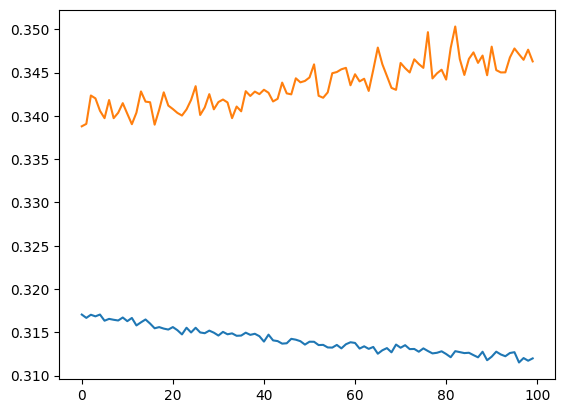

In [253]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

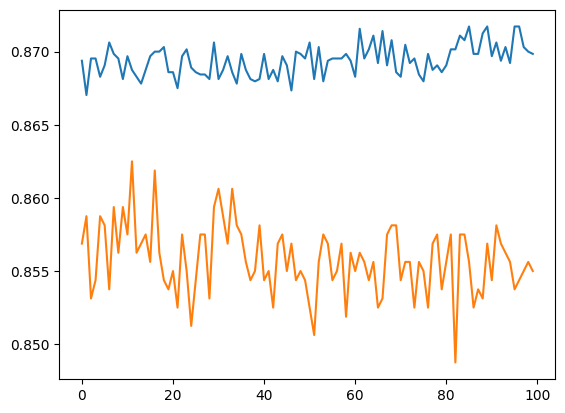

In [254]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])